In [1]:
from os import walk
import re
from os.path import join, split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from os import makedirs

import geopandas as gpd
import geoplot as gplt

# add cov to maps *
#TODO readd scaling for bar plots
#TODO tables
# bargraphs *
# maps *
#TODO distribution boxplots

In [2]:
sadc = ['Angola', 'Botswana', 'Comoros', 'Democratic_Republic_of_Congo',
        'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
        'Namibia', 'South_Africa', 'Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']
alphas = [0.01, 0.05, 0.1]
files = []

for alpha in alphas:
    for country in sadc:
        data_path = country + '/' + str(alpha) + '/results/'

        for (dirpath, _, filenames) in walk(data_path):
            files += [join(dirpath, file) for file in filenames]
            break

files

['Angola/0.01/results/multiple_runs_cases.pkl',
 'Angola/0.01/results/multiple_runs_deaths.pkl',
 'Botswana/0.01/results/multiple_runs_cases.pkl',
 'Botswana/0.01/results/multiple_runs_deaths.pkl',
 'Comoros/0.01/results/multiple_runs_cases.pkl',
 'Comoros/0.01/results/multiple_runs_deaths.pkl',
 'Democratic_Republic_of_Congo/0.01/results/multiple_runs_cases.pkl',
 'Democratic_Republic_of_Congo/0.01/results/multiple_runs_deaths.pkl',
 'Eswatini/0.01/results/multiple_runs_cases.pkl',
 'Eswatini/0.01/results/multiple_runs_deaths.pkl',
 'Lesotho/0.01/results/multiple_runs_cases.pkl',
 'Lesotho/0.01/results/multiple_runs_deaths.pkl',
 'Madagascar/0.01/results/multiple_runs_cases.pkl',
 'Madagascar/0.01/results/multiple_runs_deaths.pkl',
 'Malawi/0.01/results/multiple_runs_cases.pkl',
 'Malawi/0.01/results/multiple_runs_deaths.pkl',
 'Mauritius/0.01/results/multiple_runs_cases.pkl',
 'Mauritius/0.01/results/multiple_runs_deaths.pkl',
 'Mozambique/0.01/results/multiple_runs_cases.pkl',
 'Moz

In [3]:
# all trials for all countries
regexs = ['.*cases*', '.*deaths*']
for regex in regexs:
    r = re.compile(regex)
#     vars()["{}_results_{}".format(regex.split('*')[2], regex.split('*')[1].split('.')[1])] = {}
    files_filter = list(filter(r.match, files))
    for alpha in alphas:
        r = re.compile('.*' + str(alpha) + '*')
        files_filter_ = list(filter(r.match, files))
        vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])] = {}
        for file in files_filter_:
            vars()["{}_results_{}".format(regex.split('*')[1], str(alpha).split('.')[1])][file.split('/')[0]] = pd.read_pickle(file)
        

In [4]:
%whos dict

Variable            Type    Data/Info
-------------------------------------
cases_results_01    dict    n=16
cases_results_05    dict    n=16
cases_results_1     dict    n=16
deaths_results_01   dict    n=16
deaths_results_05   dict    n=16
deaths_results_1    dict    n=16


In [5]:
# accuracy for all countries (averaged trials)
cases_acc_01 = pd.DataFrame(columns = cases_results_01[list(cases_results_01.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_01 = pd.DataFrame(columns = deaths_results_01[list(deaths_results_01.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_05 = pd.DataFrame(columns = cases_results_05[list(cases_results_05.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_05 = pd.DataFrame(columns = deaths_results_05[list(deaths_results_05.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize
cases_acc_1 = pd.DataFrame(columns = cases_results_1[list(cases_results_1.keys())[0]].columns, index = list(cases_results_1.keys())) # initialize
deaths_acc_1 = pd.DataFrame(columns = deaths_results_1[list(deaths_results_1.keys())[0]].columns, index = list(deaths_results_1.keys())) # initialize

for key in list(deaths_results_1.keys()): # for each country
    cases_acc_01.loc[key] = cases_results_01[key].mean(axis = 0)
    deaths_acc_01.loc[key] = deaths_results_01[key].mean(axis = 0)
    cases_acc_05.loc[key] = cases_results_05[key].mean(axis = 0)
    deaths_acc_05.loc[key] = deaths_results_05[key].mean(axis = 0)
    cases_acc_1.loc[key] = cases_results_1[key].mean(axis = 0)
    deaths_acc_1.loc[key] = deaths_results_1[key].mean(axis = 0)


In [6]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
cases_acc_01    DataFrame                             <...> 1980.430717        0.0  
cases_acc_05    DataFrame                             <...> 1980.430717        0.0  
cases_acc_1     DataFrame                             <...> 1110.180598        0.0  
deaths_acc_01   DataFrame                             <...> 1980.430717        0.0  
deaths_acc_05   DataFrame                             <...> 1980.430717        0.0  
deaths_acc_1    DataFrame                             <...> 1110.180598        0.0  


In [7]:
# accuracy for all sadc (averaged trials, avergaed countries)

cases_sadc_01 = cases_acc_01.mean(axis = 0)
deaths_sadc_01 = deaths_acc_01.mean(axis = 0)
cases_sadc_05 = cases_acc_05.mean(axis = 0)
deaths_sadc_05 = deaths_acc_05.mean(axis = 0)
cases_sadc_1 = cases_acc_1.mean(axis = 0)
deaths_sadc_1 = deaths_acc_1.mean(axis = 0)

In [8]:
deaths_acc_01.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0)

,rmse_meslstm,rmse_lstm,rmse_varmax,rmse_sarimax,rmse_mlr
South_Africa,308.195662,13391.639794,1119933.79295,1133.81848,2284.218805


### South Africa

In [9]:
save_path = 'figures/'
makedirs(save_path, exist_ok = True)

objects = ('MES_LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.85

### SMAPE

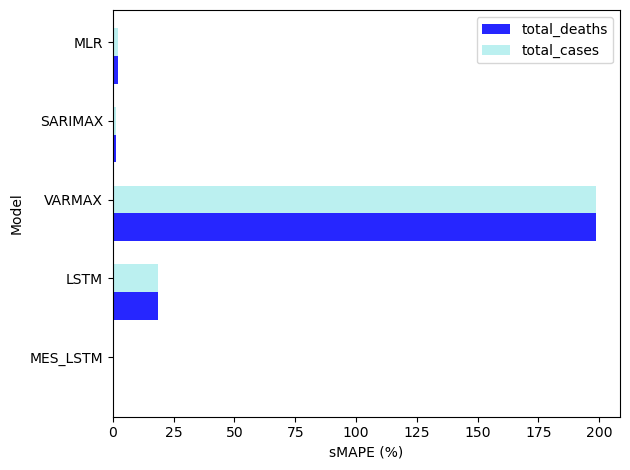

In [10]:
total_cases_01 = cases_acc_01.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'smape_sa.pdf', dpi = 600)
plt.show()


### RMSE

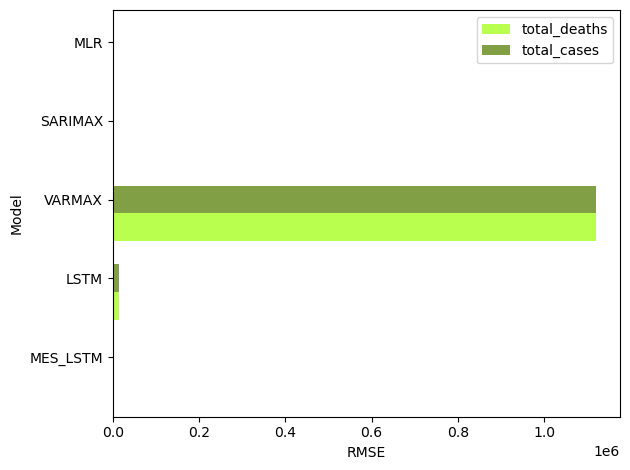

In [11]:
total_cases_01 = cases_acc_01.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'rmse', axis = 1).filter(like = 'South', axis = 0).values[0]

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'rmse_sa.pdf', dpi = 600)
plt.show()

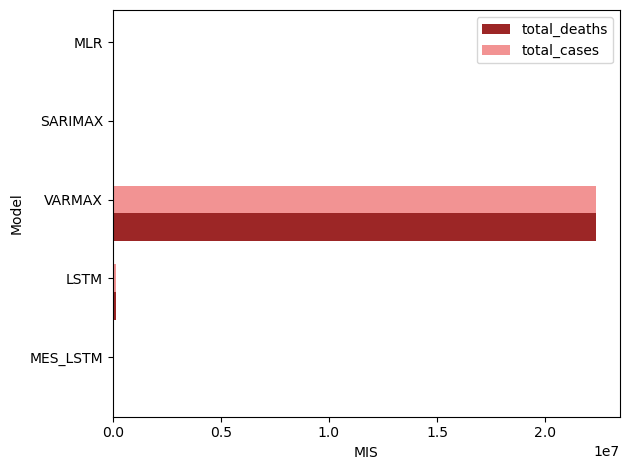

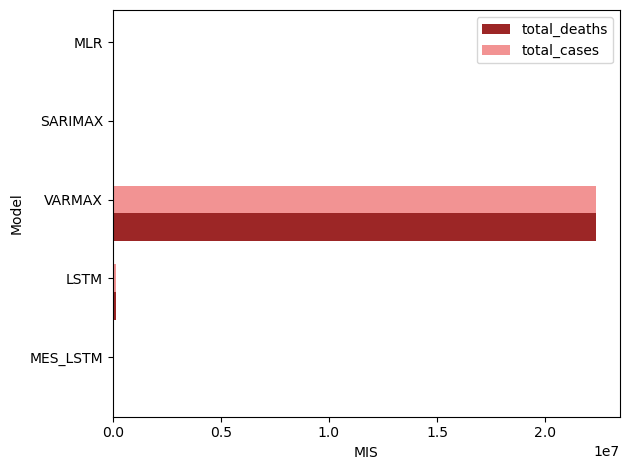

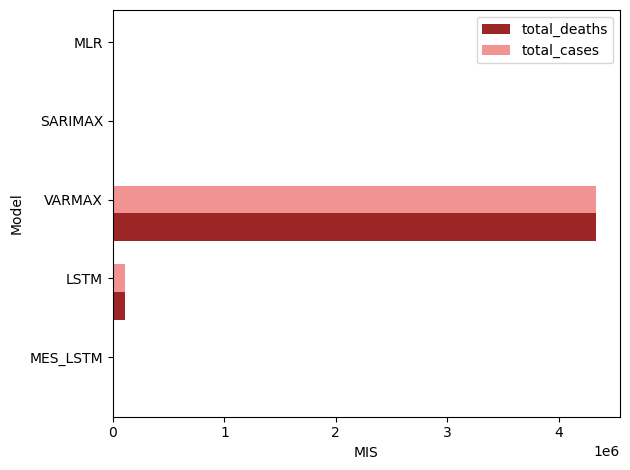

In [12]:
total_cases_01 = cases_acc_01.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.01
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sa_1.pdf', dpi = 600)
plt.show()

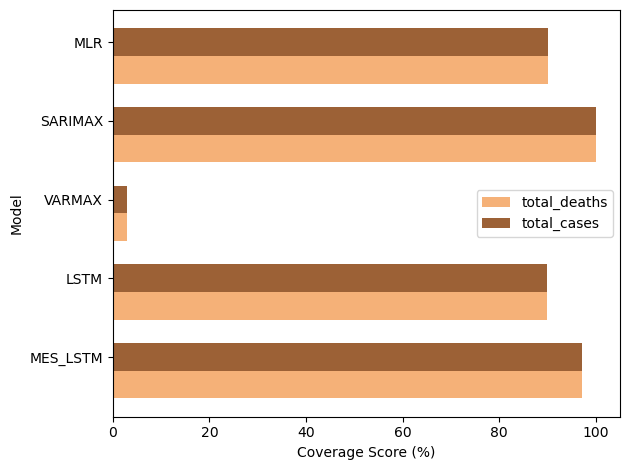

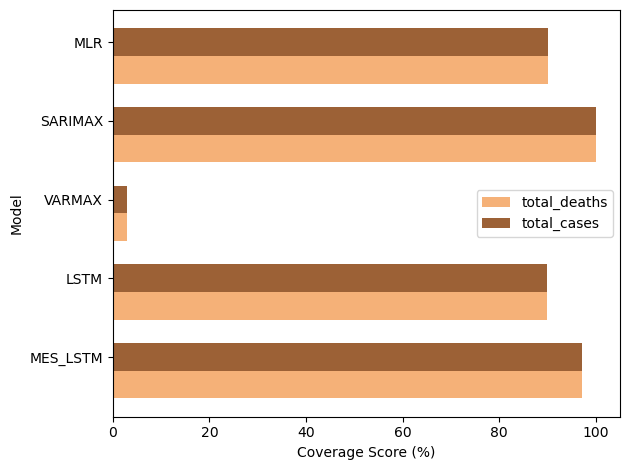

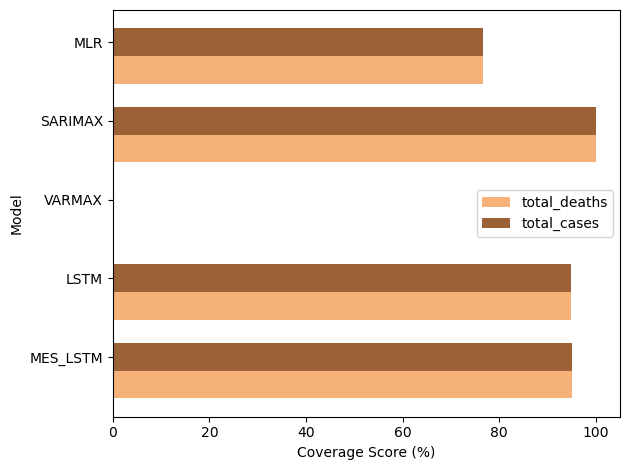

In [13]:
total_cases_01 = cases_acc_01.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_01 = deaths_acc_01.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_05 = cases_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_05 = deaths_acc_05.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_cases_1 = cases_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths_1 = deaths_acc_1.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]

# alpha = 0.01
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color =  'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'cov_sa_1.pdf', dpi = 600)
plt.show()



### SADC

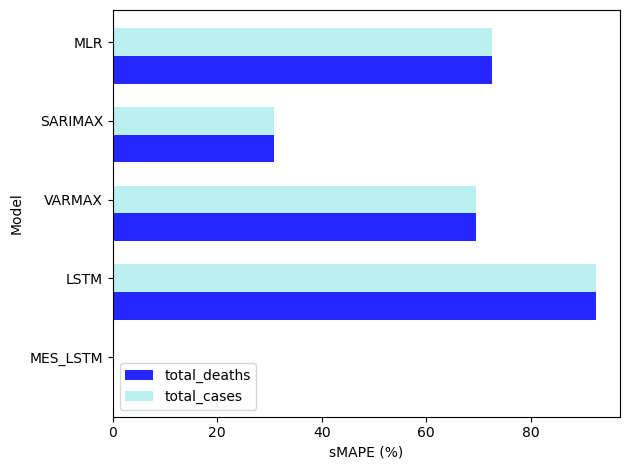

In [14]:
total_cases_01 = cases_sadc_01.filter(like = 'smape').values
total_deaths_01 = deaths_sadc_01.filter(like = 'smape').values

fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')
plt.xlabel('sMAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'smape_sadc.pdf', dpi = 600)
plt.show()

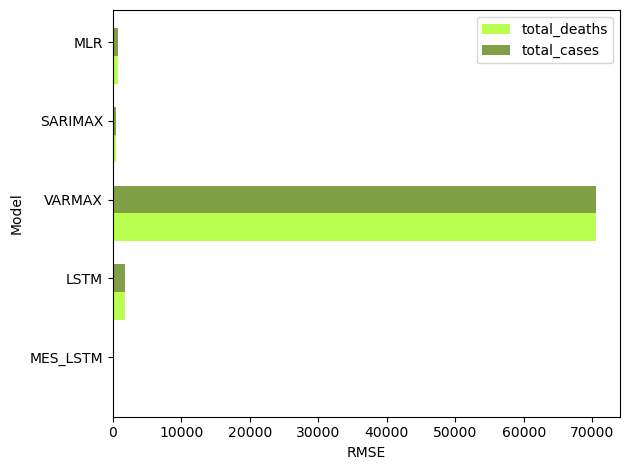

In [15]:
total_cases_01 = cases_sadc_01.filter(like = 'rmse').values
total_deaths_01 = deaths_sadc_01.filter(like = 'rmse').values


fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')
plt.xlabel('RMSE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'rmse_sadc.pdf', dpi = 600)
plt.show()

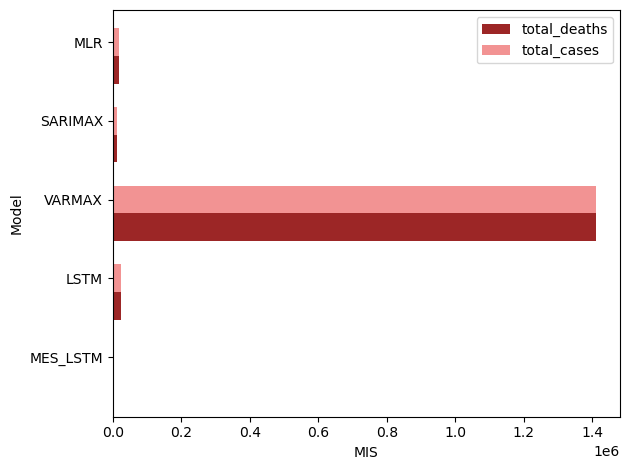

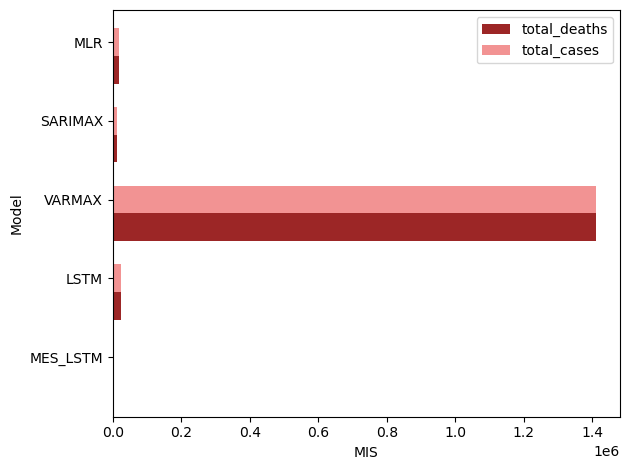

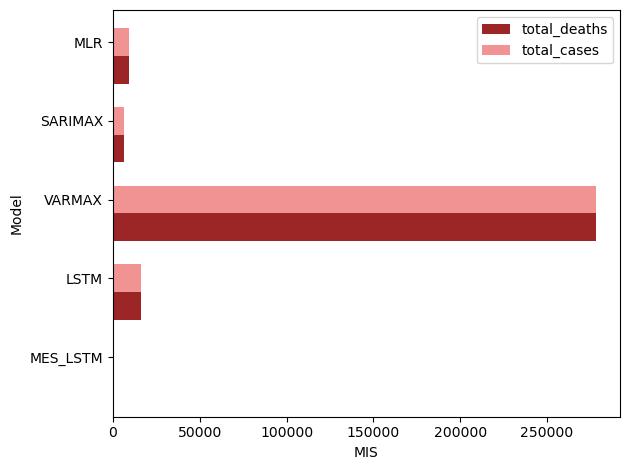

In [16]:
total_cases_01 = cases_sadc_01.filter(like = 'mis').values
total_deaths_01 = deaths_sadc_01.filter(like = 'mis').values
total_cases_05 = cases_sadc_05.filter(like = 'mis').values
total_deaths_05 = deaths_sadc_05.filter(like = 'mis').values
total_cases_1 = cases_sadc_1.filter(like = 'mis').values
total_deaths_1 = deaths_sadc_1.filter(like = 'mis').values

# alpha = 0.01
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')
plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()
plt.tight_layout()
plt.savefig(save_path + 'mis_sadc_1.pdf', dpi = 600)
plt.show()

In [ ]:
total_cases_01 = cases_sadc_01.filter(like = 'cov').values
total_deaths_01 = deaths_sadc_01.filter(like = 'cov').values
total_cases_05 = cases_sadc_05.filter(like = 'cov').values
total_deaths_05 = deaths_sadc_05.filter(like = 'cov').values
total_cases_1 = cases_sadc_1.filter(like = 'cov').values
total_deaths_1 = deaths_sadc_1.filter(like = 'cov').values

# alpha = 0.01
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_01, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_01, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 'best') #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_01.pdf', dpi = 600)
plt.show()

# alpha = 0.05
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_05, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_05, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 'best') #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_05.pdf', dpi = 600)
plt.show()

# alpha = 0.1
fig, ax = plt.subplots()
rects1 = plt.barh(y_pos, total_deaths_1, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')
rects2 = plt.barh(y_pos + bar_width, total_cases_1, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')
plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 'best') #TODO
plt.tight_layout()
plt.savefig(save_path + 'cov_sadc_1.pdf', dpi = 600)
plt.show()

### MAPS

In [18]:
sadc_map = ['Angola', 'Botswana', 'Comoros', 'Democratic Republic of the Congo', 'Swaziland',
        'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia',
        'Seychelles', 'South Africa', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe']

In [19]:
cases_smape_01 = cases_acc_01.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_05 = cases_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_smape_1 = cases_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_01 = deaths_acc_01.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_05 = deaths_acc_05.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape_1 = deaths_acc_1.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_mis_01 = cases_acc_01.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_05 = cases_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
cases_mis_1 = cases_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_01 = deaths_acc_01.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_05 = deaths_acc_05.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis_1 = deaths_acc_1.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_cov_01 = deaths_acc_01.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_05 = deaths_acc_05.filter(like = 'cov_mes', axis = 1).values[:, 0]
deaths_cov_1 = deaths_acc_1.filter(like = 'cov_mes', axis = 1).values[:, 0]

In [20]:
maps = pd.DataFrame(columns = ['country',
                               'cases_smape_01', 'cases_smape_05', 'cases_smape_1',
                               'cases_mis_01', 'cases_mis_05', 'cases_mis_1',
                               'deaths_smape_01', 'deaths_smape_05', 'deaths_smape_1',
                               'deaths_mis_01', 'deaths_mis_05', 'deaths_mis_1'])
maps['country'] = sadc_map
maps['cases_smape_01'], maps['cases_smape_05'], maps['cases_smape_1'] = cases_smape_01, cases_smape_05, cases_smape_1
maps['cases_mis_01'], maps['cases_mis_05'], maps['cases_mis_1'] = cases_mis_01, cases_mis_05, cases_mis_1
maps['cases_cov_01'], maps['cases_cov_05'], maps['cases_cov_1'] = cases_mis_01, cases_mis_05, cases_mis_1
maps['deaths_smape_01'], maps['deaths_smape_05'], maps['deaths_smape_1'] = deaths_smape_01, deaths_smape_05, deaths_smape_1
maps['deaths_mis_01'], maps['deaths_mis_05'], maps['deaths_mis_1'] = deaths_mis_01, deaths_mis_05, deaths_mis_1
maps['deaths_cov_01'], maps['deaths_cov_05'], maps['deaths_cov_1'] = deaths_cov_01, deaths_cov_05, deaths_cov_1

maps

,country,cases_smape_01,cases_smape_05,cases_smape_1,cases_mis_01,cases_mis_05,cases_mis_1,deaths_smape_01,deaths_smape_05,deaths_smape_1,deaths_mis_01,deaths_mis_05,deaths_mis_1,cases_cov_01,cases_cov_05,cases_cov_1,deaths_cov_01,deaths_cov_05,deaths_cov_1
0,Angola,0.011838,0.011838,0.01248,108.232868,108.232868,96.144139,0.011838,0.011838,0.01248,108.232868,108.232868,96.144139,108.232868,108.232868,96.144139,100.0,100.0,99.047619
1,Botswana,0.00513,0.00513,0.004953,187.379354,187.379354,122.665467,0.00513,0.00513,0.004953,187.379354,187.379354,122.665467,187.379354,187.379354,122.665467,100.0,100.0,99.67033
2,Comoros,0.011445,0.011445,0.012678,9.466849,9.466849,10.046316,0.011445,0.011445,0.012678,9.466849,9.466849,10.046316,9.466849,9.466849,10.046316,100.0,100.0,100.0
3,Democratic Republic of the Congo,0.005088,0.005088,0.005551,45.831042,45.831042,54.28438,0.005088,0.005088,0.005551,45.831042,45.831042,54.28438,45.831042,45.831042,54.28438,100.0,100.0,96.122449
4,Swaziland,0.038405,0.038405,0.039111,55.8879,55.8879,75.730559,0.038405,0.038405,0.039111,55.8879,55.8879,75.730559,55.8879,55.8879,75.730559,99.285714,99.285714,99.795918
5,Lesotho,0.007995,0.007995,0.005149,28.264265,28.264265,22.272615,0.007995,0.007995,0.005149,28.264265,28.264265,22.272615,28.264265,28.264265,22.272615,100.0,100.0,99.751553
6,Madagascar,0.002899,0.002899,0.002884,60.017308,60.017308,44.001661,0.002899,0.002899,0.002884,60.017308,60.017308,44.001661,60.017308,60.017308,44.001661,100.0,100.0,100.0
7,Malawi,0.002682,0.002682,0.003295,150.837237,150.837237,91.171746,0.002682,0.002682,0.003295,150.837237,150.837237,91.171746,150.837237,150.837237,91.171746,99.56044,99.56044,99.89011
8,Mauritius,0.018676,0.018676,0.016736,3.01635,3.01635,2.338613,0.018676,0.018676,0.016736,3.01635,3.01635,2.338613,3.01635,3.01635,2.338613,100.0,100.0,98.730159
9,Mozambique,0.094159,0.094159,0.098756,129.047707,129.047707,87.195878,0.094159,0.094159,0.098756,129.047707,129.047707,87.195878,129.047707,129.047707,87.195878,99.78836,99.78836,93.544974


In [21]:
# Load the json file with county coordinates

#geoData = gpd.read_file('https://datahub.io/core/geo-countries/r/countries.geojson')
geoData = gpd.read_file('countries.geojson')

In [22]:
sadcData = geoData[geoData.ADMIN.isin(sadc_map)]
sadcData

,ADMIN,ISO_A3,geometry
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
37,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879..."
47,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5..."
51,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -..."
135,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
144,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -..."
155,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -..."
158,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -..."
159,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -..."
161,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957..."


In [23]:
maps_full = sadcData.merge(maps, left_on=['ADMIN'], right_on=['country'])
maps_full

,ADMIN,ISO_A3,geometry,country,cases_smape_01,cases_smape_05,cases_smape_1,cases_mis_01,cases_mis_05,cases_mis_1,...,deaths_smape_1,deaths_mis_01,deaths_mis_05,deaths_mis_1,cases_cov_01,cases_cov_05,cases_cov_1,deaths_cov_01,deaths_cov_05,deaths_cov_1
0,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,0.011838,0.011838,0.01248,108.232868,108.232868,96.144139,...,0.01248,108.232868,108.232868,96.144139,108.232868,108.232868,96.144139,100.0,100.0,99.047619
1,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879...",Botswana,0.00513,0.00513,0.004953,187.379354,187.379354,122.665467,...,0.004953,187.379354,187.379354,122.665467,187.379354,187.379354,122.665467,100.0,100.0,99.67033
2,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5...",Democratic Republic of the Congo,0.005088,0.005088,0.005551,45.831042,45.831042,54.28438,...,0.005551,45.831042,45.831042,54.28438,45.831042,45.831042,54.28438,100.0,100.0,96.122449
3,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -...",Comoros,0.011445,0.011445,0.012678,9.466849,9.466849,10.046316,...,0.012678,9.466849,9.466849,10.046316,9.466849,9.466849,10.046316,100.0,100.0,100.0
4,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908...",Lesotho,0.007995,0.007995,0.005149,28.264265,28.264265,22.272615,...,0.005149,28.264265,28.264265,22.272615,28.264265,28.264265,22.272615,100.0,100.0,99.751553
5,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -...",Madagascar,0.002899,0.002899,0.002884,60.017308,60.017308,44.001661,...,0.002884,60.017308,60.017308,44.001661,60.017308,60.017308,44.001661,100.0,100.0,100.0
6,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -...",Mozambique,0.094159,0.094159,0.098756,129.047707,129.047707,87.195878,...,0.098756,129.047707,129.047707,87.195878,129.047707,129.047707,87.195878,99.78836,99.78836,93.544974
7,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -...",Mauritius,0.018676,0.018676,0.016736,3.01635,3.01635,2.338613,...,0.016736,3.01635,3.01635,2.338613,3.01635,3.01635,2.338613,100.0,100.0,98.730159
8,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -...",Malawi,0.002682,0.002682,0.003295,150.837237,150.837237,91.171746,...,0.003295,150.837237,150.837237,91.171746,150.837237,150.837237,91.171746,99.56044,99.56044,99.89011
9,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957...",Namibia,0.131352,0.131352,0.11676,195.132851,195.132851,212.343868,...,0.11676,195.132851,195.132851,212.343868,195.132851,195.132851,212.343868,96.530612,96.530612,99.795918


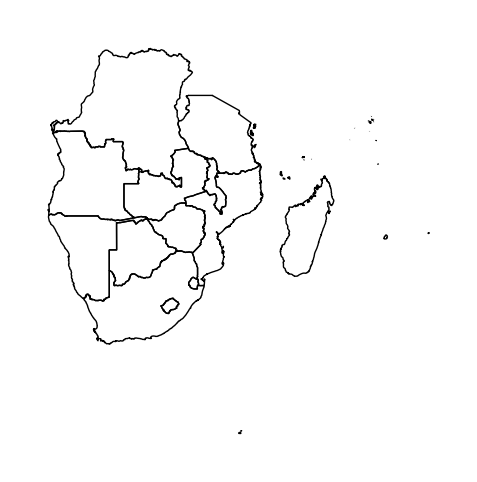

In [24]:
gplt.polyplot(sadcData);

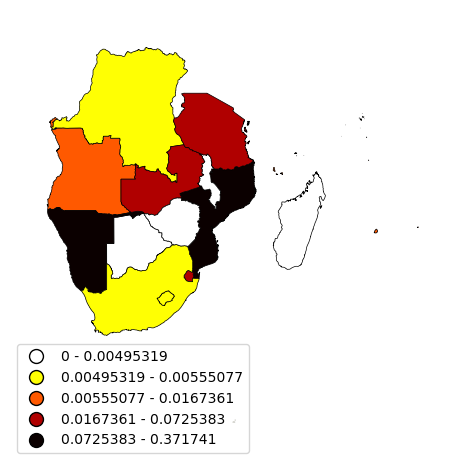

In [30]:
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(maps_full['cases_smape_1'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="cases_smape_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_cases');

plt.tight_layout()
plt.savefig(save_path + 'map_cases_smape_1.pdf', dpi = 600)
plt.show()

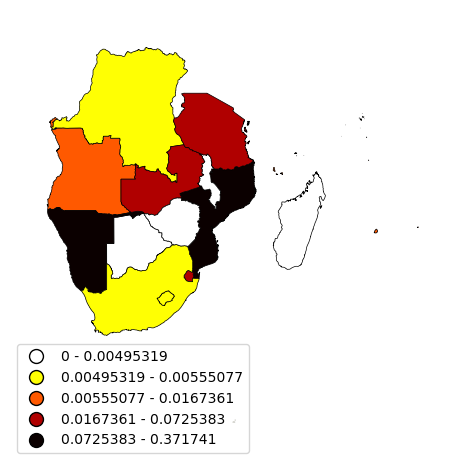

In [33]:
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(maps_full['deaths_smape_1'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="deaths_smape_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_cases');

plt.tight_layout()
plt.savefig(save_path + 'map_deaths_smape_1.pdf', dpi = 600)
plt.show()

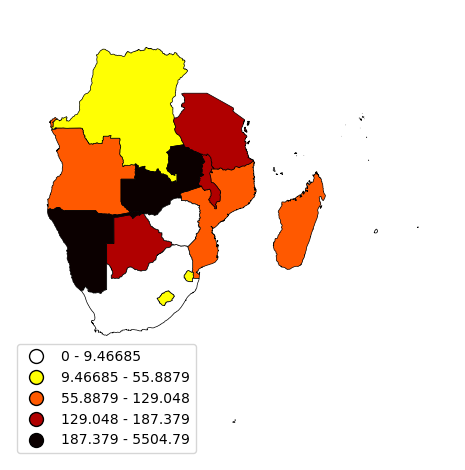

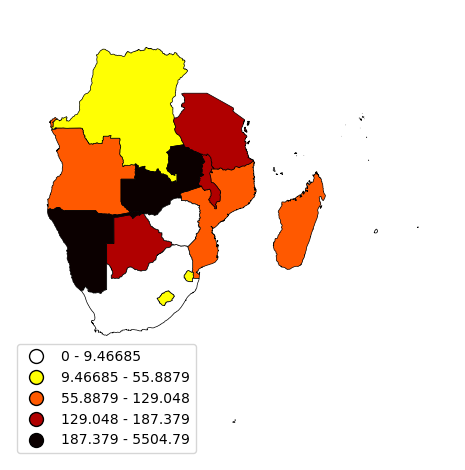

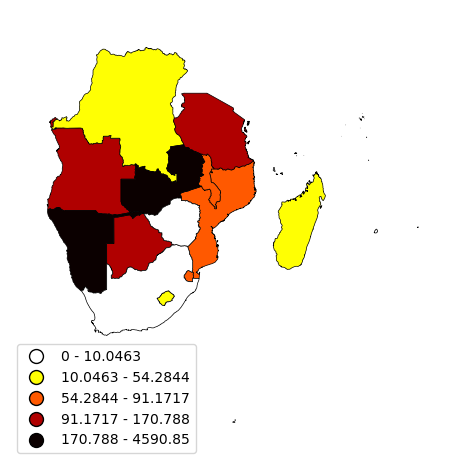

In [27]:
# MIS cases

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_mis_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_01", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_mis_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_05", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_mis_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_mis_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_mis_1.pdf', dpi = 600)
plt.show()

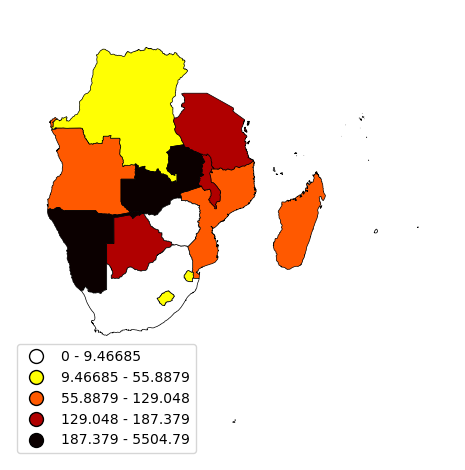

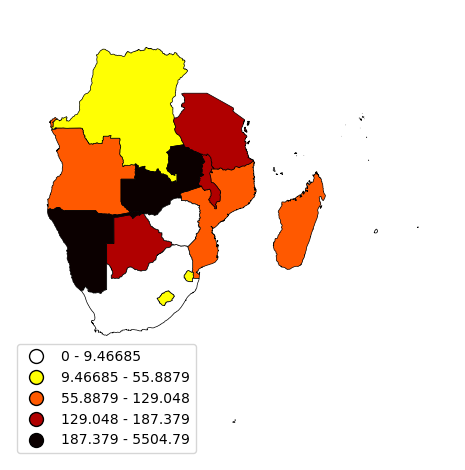

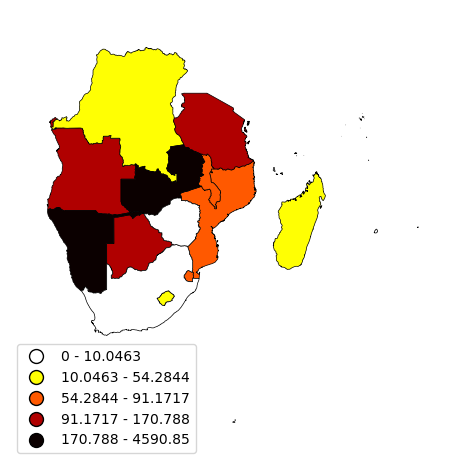

In [34]:
# MIS deaths

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_mis_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_01", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_mis_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_05", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_mis_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_mis_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_mis_1.pdf', dpi = 600)
plt.show()

/dccstor/eevdata/mathonsi/anaconda3/envs/rnn1/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/dccstor/eevdata/mathonsi/anaconda3/envs/rnn1/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


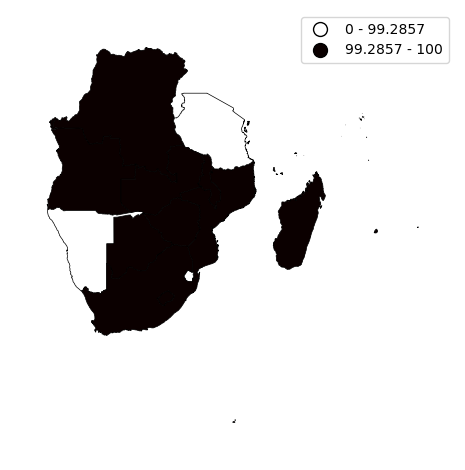

/dccstor/eevdata/mathonsi/anaconda3/envs/rnn1/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/dccstor/eevdata/mathonsi/anaconda3/envs/rnn1/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


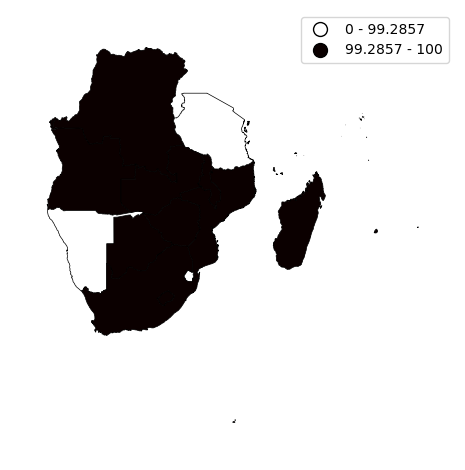

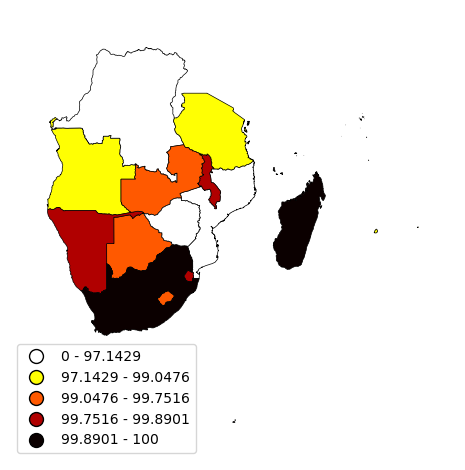

In [35]:
# COV deaths

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_cov_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_cov_01", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_cov_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_cov_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_cov_05", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_cov_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_cov_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="deaths_cov_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_deaths_cov_1.pdf', dpi = 600)
plt.show()

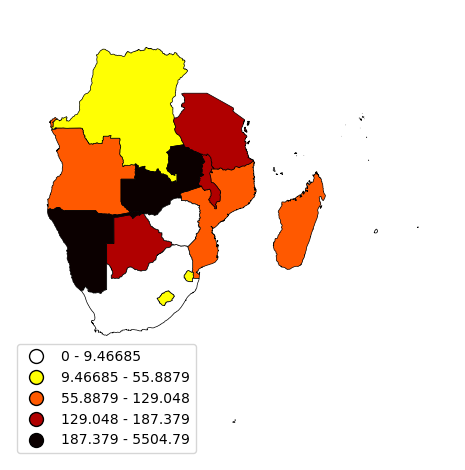

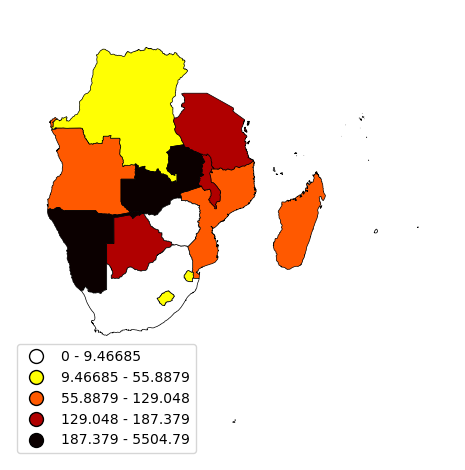

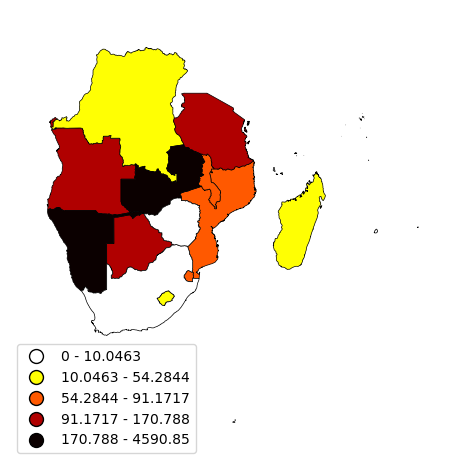

In [36]:
# COV cases

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_cov_01'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_cov_01", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_cov_01.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_cov_05'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_cov_05", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_cov_05.pdf', dpi = 600)
plt.show()

fig, ax = plt.subplots(1, 1)
# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_cov_1'], k = 5)
# map
gplt.choropleth(maps_full, 
    hue="cases_cov_1", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);
# ax.set_title('MIS for Each Country for total_cases')
plt.tight_layout()
plt.savefig(save_path + 'map_cases_cov_1.pdf', dpi = 600)
plt.show()